<h1 align = "center" >HRV analysis</h1>

## Introduction
The aim of this notebook is to perform the HRV analysis on the data from the BrainLab database. The data is stored as a CSV file. First the data will be loaded and then the HRV analysis will be performed. The HRV analysis will be performed using the  `neurokit2` library. The `neurokit2` library is a Python library for biosignal processing. The data will be loaded using the `pandas` library. The HRV analysis will be performed using the `pyhrv` and `neurokit2` libraries. The data will be plotted using the `matplotlib` library.

## Importing the libraries

In [25]:
import neurokit2 as nk 
from pyhrv import frequency_domain as fd 
from pyhrv import time_domain as td
import matplotlib.pyplot as plt 
from pathlib import Path
import pandas as pd

## Loading the data - ABP signal

In [36]:
folder_path = Path(r"C:\Users\damia\OneDrive\Pulpit\dane")
csv_files = list(folder_path.glob("*.csv"))
print(csv_files)

[WindowsPath('C:/Users/damia/OneDrive/Pulpit/dane/FINAL_SONATA_6_BREATHS_ABP_test.csv')]


## HRV analysis using ABP signal

C:\Users\damia\OneDrive\Pulpit\dane\FINAL_SONATA_6_BREATHS_ABP_test.csv
   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0   770.39898  211.689735   99.737711  132.281487    95.54483  139.617965   

   HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD    HRV_SDSD  ...  HRV_SampEn  \
0   89.177257  149.752561  219.300082  219.305908  ...    0.657806   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    6.890755     0.582883  0.982661   1.359233    1.659724  0.139283   

    HRV_HFD   HRV_KFD   HRV_LZC  
0  1.629863  1.798423  0.278376  

[1 rows x 91 columns]


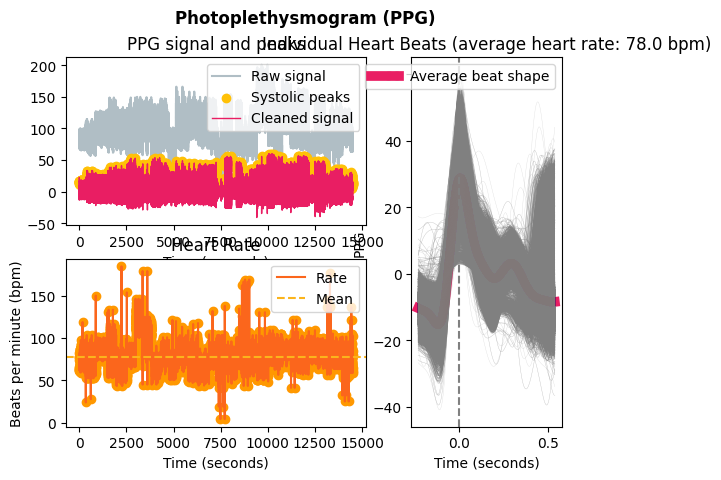

In [37]:
for name in csv_files:
    """
    Cell to process and plot the signal
    1. Clean the signal
    2. Process the signal
    3. Plot the signal
    4. Find the peaks
    5. Calculate the HRV
    """
    df = pd.read_csv(name)['Values']
    print(name)
    processed_signal, info = nk.ppg_process(df, sampling_rate=200)
    nk.ppg_plot(processed_signal, info) 
    hrv = nk.hrv(processed_signal['PPG_Peaks'], sampling_rate=200)
    print(hrv)

In [51]:
import csv

In [52]:
content = ['HRV_SDNN',    'HRV_RMSSD',    'HRV_MeanNN',    'HRV_pNN50',    'HRV_pNN20',    'HRV_LF',    'HRV_HF',    'HRV_TP',    'HRV_ApEn',    'HRV_SampEn', 'HRV_FuzzyEn', 'HRV_MSEn',    'HRV_ShanEn']

In [66]:
hrv[content]

,HRV_SDNN,HRV_RMSSD,HRV_MeanNN,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_TP,HRV_ApEn,HRV_SampEn,HRV_FuzzyEn,HRV_MSEn,HRV_ShanEn
0,211.689735,219.300082,770.39898,31.833395,64.909951,0.005245,0.000076,0.018195,0.861631,0.657806,0.582883,0.982661,6.890755


## Loading the data - ECG signal

In [15]:
folder_path = Path(r"C:\Users\damia\OneDrive\Pulpit\dane")
csv_files = list(folder_path.glob("*.csv"))
print(csv_files)

PermissionError: [Errno 13] Permission denied

## HRV analysis using ECG signal

In [ ]:
for signal, name in zip(data.signals, data.all_alaized_files_names):
    """
    Cell to process and plot the signal
    1. Clean the signal
    2. Process the signal
    3. Plot the signal
    5. Calculate the HRV
    """
    
    ekg = signal
    cleaned_signal = nk.ecg_clean(ekg, sampling_rate=200)
    processed_signal, info = nk.ecg_process(cleaned_signal, sampling_rate=200)
    nk.ecg_plot(processed_signal, info) 
    
    r_peaks = nk.ecg_peaks(cleaned_signal)
    print(name)
    hrv =nk.hrv(processed_signal['ECG_R_Peaks'], sampling_rate=200)
    print(hrv)